In [1]:
## Import Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display


C:\Users\Paul\anaconda3\envs\Tensor\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


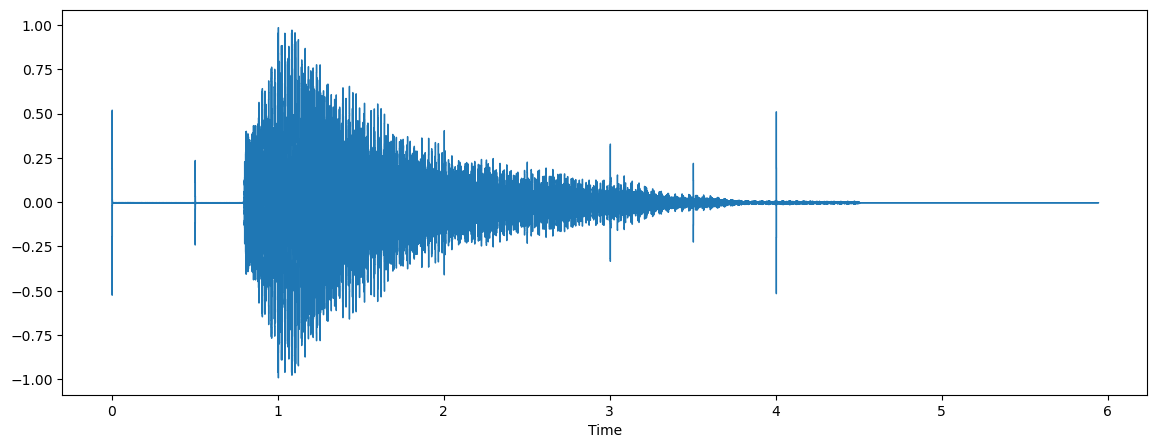

In [2]:
### Testing Audio file for a G Chord
filename='chords/G_AcusticVince_JO_1.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [3]:
sample_rate

22050

In [4]:
# Using pandas to read the labels for the data 
import pandas as pd

metadata=pd.read_csv('chords/metadata/chords.csv', encoding='latin-1')
metadata.head(10)

,slice_file_name,fold,classID,class
0,Am_AcustiicPlug14_3.wav,1,0,Am
1,Am_AcustiicPlug14_4.wav,1,0,Am
2,Am_Classic_Jegundo_1.wav,1,0,Am
3,Am_Classic_Jegundo_2.wav,1,0,Am
4,Am_Classic_Jegundo_3.wav,1,0,Am
5,Am_Classic_Jegundo_4.wav,1,0,Am
6,Am_Classic_Miguel_1.wav,1,0,Am
7,Am_Classic_Miguel_2.wav,1,0,Am
8,Am_Classic_Miguel_3.wav,1,0,Am
9,Am_Classic_Miguel_4.wav,1,0,Am


In [5]:
# Check whether the dataset is imbalanced
metadata['class'].value_counts()

Bb      176
Bdim    176
C       176
Dm      176
Em      176
F       176
G       176
Am      175
Name: class, dtype: int64

In [6]:
librosa_audio_data,librosa_sample_rate=librosa.load(filename)

In [7]:
print(librosa_audio_data)

[0.11575411 0.34580266 0.4706614  ... 0.         0.         0.        ]


In [8]:
# Mel-Frenquency Cepstral Coefficients (MFCC)
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 256)


In [9]:
mfccs

array([[-1.59138184e+02, -2.25726059e+02, -5.22420898e+02, ...,
        -5.26667542e+02, -5.26667542e+02, -5.26667542e+02],
       [ 1.42185455e+02,  1.41328796e+02,  5.89658260e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.22960777e+01, -6.13750992e+01,  5.57483435e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.75768244e-01, -1.99896440e-01, -7.89840102e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.77635831e-01,  4.05849256e-02, -1.19400001e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.96071613e-01, -1.08165964e-01, -1.59315407e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]], dtype=float32)

In [10]:
import pandas as pd
import os

audio_dataset_path='chords/audio/'
metadata=pd.read_csv('chords/metadata/chords.csv', encoding='latin-1')
metadata.head()

,slice_file_name,fold,classID,class
0,Am_AcustiicPlug14_3.wav,1,0,Am
1,Am_AcustiicPlug14_4.wav,1,0,Am
2,Am_Classic_Jegundo_1.wav,1,0,Am
3,Am_Classic_Jegundo_2.wav,1,0,Am
4,Am_Classic_Jegundo_3.wav,1,0,Am


In [11]:
# Function to extra MFCC's from file
# Takes in file
def features_extractor(file):
    # Extracts audio and sample rate 
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    # Get the MFCC
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Gets the mean
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features


In [12]:
import numpy as np
from tqdm import tqdm
# Loop through all files in folder
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    # Directory of file
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    # Get class name 
    final_class_labels=row["class"]
    # Store function result in data variable
    data=features_extractor(file_name)
    # Append data to labels
    extracted_features.append([data,final_class_labels])

1407it [00:46, 30.05it/s]


In [13]:
# Converting list to a dataframe 
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-310.07507, 115.58127, -9.356109, 66.701614, ...",Am
1,"[-325.38184, 89.79898, -22.714634, 59.974243, ...",Am
2,"[-426.48383, 68.80434, 17.367296, 12.377491, 1...",Am
3,"[-426.92947, 74.57915, 19.749193, 11.409642, 1...",Am
4,"[-379.7524, 91.52924, 19.072308, 15.82445, 14....",Am


In [14]:
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(1407, 40)

In [16]:
y

array(['Am', 'Am', 'Am', ..., 'G', 'G', 'G'], dtype='<U4')

In [17]:
# Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# Using label encoder to convert labels to number 
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [18]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train

array([[-376.01816  ,   25.606403 ,  -34.551678 , ...,   -2.1051018,
           8.162479 ,    6.61669  ],
       [-305.76407  ,  108.67407  ,  -12.370319 , ...,   -8.178744 ,
          -7.9428706,   -8.218916 ],
       [-346.63837  ,   97.97505  ,    6.5942063, ...,   -5.8827257,
          -8.258599 ,   -7.7149906],
       ...,
       [-597.9003   ,  125.78048  ,   64.160614 , ...,   -1.690684 ,
           2.572639 ,    2.857646 ],
       [-275.87088  ,   90.56587  ,  -39.421616 , ...,   -7.284234 ,
          -8.226922 ,   -9.9196   ],
       [-370.27213  ,   81.09581  ,  -24.828781 , ...,  -16.228191 ,
          -9.71786  ,   -2.4480734]], dtype=float32)

In [21]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [22]:
X_train.shape

(1125, 40)

In [23]:
X_test.shape

(282, 40)

In [24]:
y_train.shape

(1125, 8)

In [25]:
y_test.shape

(282, 8)

# Model Creation

In [26]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [28]:
# Number of classes
num_labels=y.shape[1]

In [29]:
# CNN model
model=Sequential()
# First layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final/Output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [31]:
# Compile model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [32]:
## Training the model 
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/guitar_chords.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/1000
 1/36 [..............................] - ETA: 10s - loss: 66.2970 - accuracy: 0.1250
Epoch 1: val_loss improved from inf to 3.46173, saving model to saved_models\guitar_chords.hdf5
36/36 [==============================] - 1s 7ms/step - loss: 36.9621 - accuracy: 0.1253 - val_loss: 3.4617 - val_accuracy: 0.1383
Epoch 2/1000
 1/36 [..............................] - ETA: 0s - loss: 20.3606 - accuracy: 0.2812
Epoch 2: val_loss improved from 3.46173 to 2.22980, saving model to saved_models\guitar_chords.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 14.5624 - accuracy: 0.1476 - val_loss: 2.2298 - val_accuracy: 0.1277
Epoch 3/1000
 1/36 [..............................] - ETA: 0s - loss: 6.6259 - accuracy: 0.1250
Epoch 3: val_loss improved from 2.22980 to 2.03332, saving model to saved_models\guitar_chords.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 8.2892 - accuracy: 0.1413 - val_loss: 2.0333 - val_accuracy: 0.1773
Epoch 4/1000
 1/36 [....

Epoch 29/1000
 1/36 [..............................] - ETA: 0s - loss: 1.6011 - accuracy: 0.4375
Epoch 29: val_loss improved from 1.42303 to 1.29165, saving model to saved_models\guitar_chords.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.6265 - accuracy: 0.3698 - val_loss: 1.2916 - val_accuracy: 0.6454
Epoch 30/1000
 1/36 [..............................] - ETA: 0s - loss: 1.4356 - accuracy: 0.3750
Epoch 30: val_loss improved from 1.29165 to 1.25153, saving model to saved_models\guitar_chords.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.6048 - accuracy: 0.3751 - val_loss: 1.2515 - val_accuracy: 0.6915
Epoch 31/1000
 1/36 [..............................] - ETA: 0s - loss: 1.4083 - accuracy: 0.3750
Epoch 31: val_loss improved from 1.25153 to 1.17113, saving model to saved_models\guitar_chords.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.5521 - accuracy: 0.4231 - val_loss: 1.1711 - val_accuracy: 0.6915
Epoch 32/1000
 1/36

Epoch 55/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5984 - accuracy: 0.7812
Epoch 55: val_loss improved from 0.36573 to 0.33278, saving model to saved_models\guitar_chords.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.7698 - val_loss: 0.3328 - val_accuracy: 0.8972
Epoch 56/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7471 - accuracy: 0.7812
Epoch 56: val_loss did not improve from 0.33278
36/36 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.7449 - val_loss: 0.3672 - val_accuracy: 0.8759
Epoch 57/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7685 - accuracy: 0.6562
Epoch 57: val_loss improved from 0.33278 to 0.33035, saving model to saved_models\guitar_chords.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.7573 - val_loss: 0.3303 - val_accuracy: 0.8936
Epoch 58/1000
 1/36 [..............................] - ETA: 0s - loss: 0

36/36 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.8604 - val_loss: 0.1990 - val_accuracy: 0.9397
Epoch 83/1000
 1/36 [..............................] - ETA: 0s - loss: 0.4955 - accuracy: 0.7812
Epoch 83: val_loss did not improve from 0.19899
36/36 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8578 - val_loss: 0.2109 - val_accuracy: 0.9291
Epoch 84/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2028 - accuracy: 0.9062
Epoch 84: val_loss did not improve from 0.19899
36/36 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8489 - val_loss: 0.2183 - val_accuracy: 0.9362
Epoch 85/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2742 - accuracy: 0.8438
Epoch 85: val_loss did not improve from 0.19899
36/36 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8569 - val_loss: 0.2085 - val_accuracy: 0.9220
Epoch 86/1000
 1/36 [............................

Epoch 111/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8750
Epoch 111: val_loss did not improve from 0.15868
36/36 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8960 - val_loss: 0.1732 - val_accuracy: 0.9433
Epoch 112/1000
 1/36 [..............................] - ETA: 0s - loss: 0.3130 - accuracy: 0.9375
Epoch 112: val_loss improved from 0.15868 to 0.14725, saving model to saved_models\guitar_chords.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.2881 - accuracy: 0.9004 - val_loss: 0.1472 - val_accuracy: 0.9539
Epoch 113/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5054 - accuracy: 0.8438
Epoch 113: val_loss did not improve from 0.14725
36/36 [==============================] - 0s 2ms/step - loss: 0.2550 - accuracy: 0.9147 - val_loss: 0.1533 - val_accuracy: 0.9504
Epoch 114/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1536 - accuracy: 0.9375
Epoch 114: val_loss d

 1/36 [..............................] - ETA: 0s - loss: 0.1980 - accuracy: 0.9375
Epoch 140: val_loss did not improve from 0.11549
36/36 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9218 - val_loss: 0.1275 - val_accuracy: 0.9645
Epoch 141/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2514 - accuracy: 0.8438
Epoch 141: val_loss did not improve from 0.11549
36/36 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9236 - val_loss: 0.1261 - val_accuracy: 0.9574
Epoch 142/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9062
Epoch 142: val_loss did not improve from 0.11549
36/36 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9253 - val_loss: 0.1352 - val_accuracy: 0.9610
Epoch 143/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1365 - accuracy: 0.9375
Epoch 143: val_loss did not improve from 0.11549
36/36 [==============================] -

Epoch 170/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0527 - accuracy: 1.0000
Epoch 170: val_loss did not improve from 0.11549
36/36 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9422 - val_loss: 0.1432 - val_accuracy: 0.9539
Epoch 171/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2279 - accuracy: 0.9375
Epoch 171: val_loss did not improve from 0.11549
36/36 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9351 - val_loss: 0.1471 - val_accuracy: 0.9504
Epoch 172/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1427 - accuracy: 0.9375
Epoch 172: val_loss did not improve from 0.11549
36/36 [==============================] - 0s 2ms/step - loss: 0.2097 - accuracy: 0.9289 - val_loss: 0.1342 - val_accuracy: 0.9610
Epoch 173/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1382 - accuracy: 0.9375
Epoch 173: val_loss did not improve from 0.11549
36/36 [==================

36/36 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9396 - val_loss: 0.1422 - val_accuracy: 0.9433
Epoch 200/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1322 - accuracy: 0.9688
Epoch 200: val_loss did not improve from 0.11219
36/36 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9369 - val_loss: 0.1396 - val_accuracy: 0.9574
Epoch 201/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2991 - accuracy: 0.9375
Epoch 201: val_loss did not improve from 0.11219
36/36 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9360 - val_loss: 0.1700 - val_accuracy: 0.9397
Epoch 202/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1648 - accuracy: 0.9375
Epoch 202: val_loss did not improve from 0.11219
36/36 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9369 - val_loss: 0.1389 - val_accuracy: 0.9539
Epoch 203/1000
 1/36 [.....................

 1/36 [..............................] - ETA: 0s - loss: 0.2584 - accuracy: 0.9375
Epoch 229: val_loss did not improve from 0.10677
36/36 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9351 - val_loss: 0.1102 - val_accuracy: 0.9539
Epoch 230/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1685 - accuracy: 0.9062
Epoch 230: val_loss did not improve from 0.10677
36/36 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9333 - val_loss: 0.1315 - val_accuracy: 0.9468
Epoch 231/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0522 - accuracy: 0.9688
Epoch 231: val_loss did not improve from 0.10677
36/36 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9378 - val_loss: 0.1393 - val_accuracy: 0.9539
Epoch 232/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0296 - accuracy: 1.0000
Epoch 232: val_loss did not improve from 0.10677
36/36 [==============================] -

36/36 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9458 - val_loss: 0.1202 - val_accuracy: 0.9645
Epoch 259/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1569 - accuracy: 0.9375
Epoch 259: val_loss did not improve from 0.10122
36/36 [==============================] - 0s 2ms/step - loss: 0.1406 - accuracy: 0.9520 - val_loss: 0.1416 - val_accuracy: 0.9574
Epoch 260/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1817 - accuracy: 0.9688
Epoch 260: val_loss did not improve from 0.10122
36/36 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.9493 - val_loss: 0.1203 - val_accuracy: 0.9574
Epoch 261/1000
 1/36 [..............................] - ETA: 0s - loss: 0.4647 - accuracy: 0.8750
Epoch 261: val_loss did not improve from 0.10122
36/36 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9502 - val_loss: 0.1260 - val_accuracy: 0.9610
Epoch 262/1000
 1/36 [.....................

Epoch 288/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0385 - accuracy: 1.0000
Epoch 288: val_loss did not improve from 0.09365
36/36 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9591 - val_loss: 0.1538 - val_accuracy: 0.9468
Epoch 289/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1068 - accuracy: 0.9375
Epoch 289: val_loss did not improve from 0.09365
36/36 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9591 - val_loss: 0.1283 - val_accuracy: 0.9539
Epoch 290/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1840 - accuracy: 0.9062
Epoch 290: val_loss did not improve from 0.09365
36/36 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9484 - val_loss: 0.1252 - val_accuracy: 0.9610
Epoch 291/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2337 - accuracy: 0.9062
Epoch 291: val_loss did not improve from 0.09365
36/36 [==================

36/36 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9520 - val_loss: 0.1438 - val_accuracy: 0.9504
Epoch 318/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1361 - accuracy: 0.9688
Epoch 318: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9342 - val_loss: 0.2221 - val_accuracy: 0.9433
Epoch 319/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2237 - accuracy: 0.9375
Epoch 319: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9351 - val_loss: 0.1620 - val_accuracy: 0.9539
Epoch 320/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1209 - accuracy: 0.9688
Epoch 320: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9307 - val_loss: 0.1669 - val_accuracy: 0.9574
Epoch 321/1000
 1/36 [.....................

 1/36 [..............................] - ETA: 0s - loss: 0.1466 - accuracy: 0.9062
Epoch 347: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 0.9476 - val_loss: 0.1442 - val_accuracy: 0.9574
Epoch 348/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2118 - accuracy: 0.9062
Epoch 348: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9609 - val_loss: 0.1387 - val_accuracy: 0.9539
Epoch 349/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0491 - accuracy: 1.0000
Epoch 349: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9573 - val_loss: 0.1481 - val_accuracy: 0.9539
Epoch 350/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0236 - accuracy: 0.9688
Epoch 350: val_loss did not improve from 0.08040
36/36 [==============================] -

Epoch 377/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1888 - accuracy: 0.9375
Epoch 377: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9511 - val_loss: 0.1269 - val_accuracy: 0.9574
Epoch 378/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2836 - accuracy: 0.9375
Epoch 378: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9564 - val_loss: 0.1100 - val_accuracy: 0.9610
Epoch 379/1000
 1/36 [..............................] - ETA: 0s - loss: 6.9713e-04 - accuracy: 1.0000
Epoch 379: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9467 - val_loss: 0.1402 - val_accuracy: 0.9468
Epoch 380/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0524 - accuracy: 0.9688
Epoch 380: val_loss did not improve from 0.08040
36/36 [==============

Epoch 407/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1091 - accuracy: 0.9688
Epoch 407: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9520 - val_loss: 0.0892 - val_accuracy: 0.9858
Epoch 408/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1089 - accuracy: 0.9375
Epoch 408: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9573 - val_loss: 0.0933 - val_accuracy: 0.9681
Epoch 409/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1288 - accuracy: 0.9688
Epoch 409: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9502 - val_loss: 0.1112 - val_accuracy: 0.9716
Epoch 410/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2063 - accuracy: 0.9062
Epoch 410: val_loss did not improve from 0.08040
36/36 [==================

Epoch 437/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2384 - accuracy: 0.9375
Epoch 437: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9502 - val_loss: 0.1490 - val_accuracy: 0.9574
Epoch 438/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0306 - accuracy: 1.0000
Epoch 438: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1235 - accuracy: 0.9609 - val_loss: 0.1555 - val_accuracy: 0.9574
Epoch 439/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1224 - accuracy: 0.9688
Epoch 439: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9671 - val_loss: 0.1038 - val_accuracy: 0.9752
Epoch 440/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0062 - accuracy: 1.0000
Epoch 440: val_loss did not improve from 0.08040
36/36 [==================

Epoch 467/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1892 - accuracy: 0.9375
Epoch 467: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9671 - val_loss: 0.1751 - val_accuracy: 0.9539
Epoch 468/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0955 - accuracy: 0.9688
Epoch 468: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9573 - val_loss: 0.2053 - val_accuracy: 0.9574
Epoch 469/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5517 - accuracy: 0.9688
Epoch 469: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.9680 - val_loss: 0.1433 - val_accuracy: 0.9681
Epoch 470/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1053 - accuracy: 0.9688
Epoch 470: val_loss did not improve from 0.08040
36/36 [==================

Epoch 497/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1284 - accuracy: 0.9688
Epoch 497: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9698 - val_loss: 0.1544 - val_accuracy: 0.9610
Epoch 498/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0795 - accuracy: 0.9688
Epoch 498: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.9644 - val_loss: 0.1072 - val_accuracy: 0.9716
Epoch 499/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2031 - accuracy: 0.9375
Epoch 499: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9644 - val_loss: 0.1038 - val_accuracy: 0.9574
Epoch 500/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0510 - accuracy: 0.9688
Epoch 500: val_loss did not improve from 0.08040
36/36 [==================

Epoch 527/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1286 - accuracy: 0.9688
Epoch 527: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9662 - val_loss: 0.1119 - val_accuracy: 0.9681
Epoch 528/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0451 - accuracy: 1.0000
Epoch 528: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9636 - val_loss: 0.1159 - val_accuracy: 0.9645
Epoch 529/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0167 - accuracy: 1.0000
Epoch 529: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9467 - val_loss: 0.1456 - val_accuracy: 0.9681
Epoch 530/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2792 - accuracy: 0.9062
Epoch 530: val_loss did not improve from 0.08040
36/36 [==================

Epoch 557/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0851 - accuracy: 0.9688
Epoch 557: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9564 - val_loss: 0.1309 - val_accuracy: 0.9645
Epoch 558/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000
Epoch 558: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9591 - val_loss: 0.1574 - val_accuracy: 0.9433
Epoch 559/1000
 1/36 [..............................] - ETA: 0s - loss: 0.5147 - accuracy: 0.9375
Epoch 559: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1614 - accuracy: 0.9547 - val_loss: 0.1141 - val_accuracy: 0.9645
Epoch 560/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1394 - accuracy: 0.9375
Epoch 560: val_loss did not improve from 0.08040
36/36 [==================

Epoch 587/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2698 - accuracy: 0.8438
Epoch 587: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9591 - val_loss: 0.1336 - val_accuracy: 0.9504
Epoch 588/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2942 - accuracy: 0.9062
Epoch 588: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9564 - val_loss: 0.1094 - val_accuracy: 0.9645
Epoch 589/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1379 - accuracy: 0.9688
Epoch 589: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9627 - val_loss: 0.1258 - val_accuracy: 0.9610
Epoch 590/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1511 - accuracy: 0.9688
Epoch 590: val_loss did not improve from 0.08040
36/36 [==================

Epoch 617/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1058 - accuracy: 0.9688
Epoch 617: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9529 - val_loss: 0.1458 - val_accuracy: 0.9645
Epoch 618/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0164 - accuracy: 1.0000
Epoch 618: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9582 - val_loss: 0.1050 - val_accuracy: 0.9645
Epoch 619/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1651 - accuracy: 0.9375
Epoch 619: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9547 - val_loss: 0.1445 - val_accuracy: 0.9610
Epoch 620/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1162 - accuracy: 0.9688
Epoch 620: val_loss did not improve from 0.08040
36/36 [==================

Epoch 647/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2368 - accuracy: 0.9062
Epoch 647: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9582 - val_loss: 0.1282 - val_accuracy: 0.9504
Epoch 648/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0683 - accuracy: 0.9688
Epoch 648: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9609 - val_loss: 0.1187 - val_accuracy: 0.9539
Epoch 649/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0732 - accuracy: 0.9688
Epoch 649: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9724 - val_loss: 0.0996 - val_accuracy: 0.9645
Epoch 650/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0885 - accuracy: 0.9688
Epoch 650: val_loss did not improve from 0.08040
36/36 [==================

Epoch 677/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2427 - accuracy: 0.9062
Epoch 677: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9627 - val_loss: 0.1438 - val_accuracy: 0.9574
Epoch 678/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0487 - accuracy: 0.9688
Epoch 678: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9662 - val_loss: 0.1355 - val_accuracy: 0.9645
Epoch 679/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0604 - accuracy: 0.9688
Epoch 679: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9698 - val_loss: 0.1415 - val_accuracy: 0.9574
Epoch 680/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0258 - accuracy: 1.0000
Epoch 680: val_loss did not improve from 0.08040
36/36 [==================

Epoch 707/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1135 - accuracy: 0.9688
Epoch 707: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9671 - val_loss: 0.1647 - val_accuracy: 0.9574
Epoch 708/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0185 - accuracy: 1.0000
Epoch 708: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9733 - val_loss: 0.1523 - val_accuracy: 0.9504
Epoch 709/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1314 - accuracy: 0.9688
Epoch 709: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9618 - val_loss: 0.1632 - val_accuracy: 0.9504
Epoch 710/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0934 - accuracy: 0.9688
Epoch 710: val_loss did not improve from 0.08040
36/36 [==================

Epoch 737/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1546 - accuracy: 0.9688
Epoch 737: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9600 - val_loss: 0.1150 - val_accuracy: 0.9716
Epoch 738/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0688 - accuracy: 0.9688
Epoch 738: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9547 - val_loss: 0.1273 - val_accuracy: 0.9539
Epoch 739/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1738 - accuracy: 0.9062
Epoch 739: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.9529 - val_loss: 0.1065 - val_accuracy: 0.9610
Epoch 740/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0433 - accuracy: 1.0000
Epoch 740: val_loss did not improve from 0.08040
36/36 [==================

Epoch 767/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1263 - accuracy: 0.9375
Epoch 767: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9653 - val_loss: 0.1428 - val_accuracy: 0.9504
Epoch 768/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 768: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9689 - val_loss: 0.1398 - val_accuracy: 0.9645
Epoch 769/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1383 - accuracy: 0.9688
Epoch 769: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.9662 - val_loss: 0.1452 - val_accuracy: 0.9610
Epoch 770/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1664 - accuracy: 0.9062
Epoch 770: val_loss did not improve from 0.08040
36/36 [==================

Epoch 797/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0341 - accuracy: 1.0000
Epoch 797: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9636 - val_loss: 0.1601 - val_accuracy: 0.9610
Epoch 798/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0180 - accuracy: 1.0000
Epoch 798: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9627 - val_loss: 0.1347 - val_accuracy: 0.9610
Epoch 799/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0594 - accuracy: 1.0000
Epoch 799: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9644 - val_loss: 0.1760 - val_accuracy: 0.9539
Epoch 800/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0511 - accuracy: 1.0000
Epoch 800: val_loss did not improve from 0.08040
36/36 [==================

Epoch 827/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0593 - accuracy: 0.9688
Epoch 827: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9698 - val_loss: 0.1693 - val_accuracy: 0.9610
Epoch 828/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0217 - accuracy: 1.0000
Epoch 828: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9769 - val_loss: 0.1732 - val_accuracy: 0.9645
Epoch 829/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2137 - accuracy: 0.9062
Epoch 829: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9600 - val_loss: 0.1502 - val_accuracy: 0.9610
Epoch 830/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1489 - accuracy: 0.9688
Epoch 830: val_loss did not improve from 0.08040
36/36 [==================

Epoch 857/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1574 - accuracy: 0.9375
Epoch 857: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9698 - val_loss: 0.1403 - val_accuracy: 0.9539
Epoch 858/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0338 - accuracy: 1.0000
Epoch 858: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9689 - val_loss: 0.1495 - val_accuracy: 0.9574
Epoch 859/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9688
Epoch 859: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9591 - val_loss: 0.1378 - val_accuracy: 0.9539
Epoch 860/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0394 - accuracy: 0.9688
Epoch 860: val_loss did not improve from 0.08040
36/36 [==================

Epoch 887/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9375
Epoch 887: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9627 - val_loss: 0.1292 - val_accuracy: 0.9681
Epoch 888/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1455 - accuracy: 0.9375
Epoch 888: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.9609 - val_loss: 0.1436 - val_accuracy: 0.9645
Epoch 889/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1701 - accuracy: 0.9062
Epoch 889: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9644 - val_loss: 0.1382 - val_accuracy: 0.9574
Epoch 890/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1052 - accuracy: 0.9688
Epoch 890: val_loss did not improve from 0.08040
36/36 [==================

Epoch 917/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0913 - accuracy: 0.9375
Epoch 917: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9644 - val_loss: 0.1272 - val_accuracy: 0.9716
Epoch 918/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0545 - accuracy: 0.9688
Epoch 918: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9662 - val_loss: 0.1437 - val_accuracy: 0.9610
Epoch 919/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2781 - accuracy: 0.8750
Epoch 919: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9689 - val_loss: 0.1425 - val_accuracy: 0.9539
Epoch 920/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0191 - accuracy: 1.0000
Epoch 920: val_loss did not improve from 0.08040
36/36 [==================

Epoch 947/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0783 - accuracy: 0.9688
Epoch 947: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9556 - val_loss: 0.1310 - val_accuracy: 0.9681
Epoch 948/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0601 - accuracy: 0.9688
Epoch 948: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9680 - val_loss: 0.1573 - val_accuracy: 0.9610
Epoch 949/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0438 - accuracy: 1.0000
Epoch 949: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9671 - val_loss: 0.1512 - val_accuracy: 0.9610
Epoch 950/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0620 - accuracy: 1.0000
Epoch 950: val_loss did not improve from 0.08040
36/36 [==================

Epoch 977/1000
 1/36 [..............................] - ETA: 0s - loss: 3.2042e-04 - accuracy: 1.0000
Epoch 977: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9609 - val_loss: 0.1572 - val_accuracy: 0.9681
Epoch 978/1000
 1/36 [..............................] - ETA: 0s - loss: 0.0898 - accuracy: 0.9375
Epoch 978: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9680 - val_loss: 0.1949 - val_accuracy: 0.9539
Epoch 979/1000
 1/36 [..............................] - ETA: 0s - loss: 0.2349 - accuracy: 0.9062
Epoch 979: val_loss did not improve from 0.08040
36/36 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.9600 - val_loss: 0.1484 - val_accuracy: 0.9610
Epoch 980/1000
 1/36 [..............................] - ETA: 0s - loss: 0.1732 - accuracy: 0.9062
Epoch 980: val_loss did not improve from 0.08040
36/36 [==============

In [33]:
# How accurate is the model
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9645389914512634


# Testing Some Test Audio Data

In [34]:
test_files = ["chords/Bdim_RockGB_JO_4.wav", "chords/Bb_Electric1_LInda_2.wav", "chords/C_Classic_Jo_1.wav", "chords/chord.wav", "chords/G_AcusticVince_JO_1.wav"]

# For loop through test files
for file in test_files:
    # load file
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    # Get features
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Scaled features
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

#     print(mfccs_scaled_features)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    print(mfccs_scaled_features)
    print(mfccs_scaled_features.shape)

    # Get predicted label
    predicted_label=model.predict(mfccs_scaled_features) 
    predicted_label=np.argmax(predicted_label,axis=1)

    print("File: ", file)
    print("predicted label is:",predicted_label)
    # Get predicted class name
    prediction_class = labelencoder.inverse_transform(predicted_label)
    print("predicted class is:",prediction_class)



[[-214.67282      74.57026     -33.601284     59.274796    -17.715652
     7.967517    -25.559654    -10.933032    -12.2735195   -10.247327
    -4.2948594    -6.0972624   -13.315959     -6.313042     -8.701481
    -4.19669     -12.898077     -5.709257    -10.917652     -1.4682356
   -11.867545      2.4480946     3.0500708     7.9529066     3.7928612
     1.9837338    -2.7545595    -9.052628     -5.212719     -5.303257
    -2.5949895    -1.9327831    -4.7696705     0.8434494     3.9723747
    -0.7116716    -6.099894     -8.262587     -4.4723835    -0.88231146]]
(1, 40)
1/1 [==============================] - 0s 71ms/step
File:  chords/Bdim_RockGB_JO_4.wav
predicted label is: [2]
predicted class is: ['Bdim']
[[-5.38715088e+02  9.06808701e+01 -5.15460281e+01  2.30409069e+01
   1.28178415e+01  2.21404324e+01 -4.98186493e+00 -1.00137396e+01
  -1.83919735e+01 -1.39137383e+01 -9.68844223e+00 -2.61757545e+01
  -5.06631899e+00 -8.41339207e+00 -6.60335970e+00 -6.23966217e+00
  -8.06850815e+00 -1.

In [35]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://49338e19-81da-49dd-8f08-bee32e62b340/assets


FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://b83d0ace-6d1e-4c62-85ea-aa595893fee9/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.